**TASK1 FOR 300 WORDS**

In [16]:
# !pip install httpx==0.27.0
# !pip install jupyter-lsp==2.0.0
!pip install googletrans==4.0.0-rc1 --upgrade

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [33]:
import nltk
from googletrans import Translator
import random
import csv

# Download NLTK word list
nltk.download('words')
from nltk.corpus import words

# Sample English words from the nltk word list
word_list = words.words()

# Create an instance of Translator
translator = Translator()

# 4 languages for translation (e.g., Hindi, French, Spanish, German, Tamil)
languages = ['hi', 'fr', 'es', 'de', 'ta']

# Sample 500-5000 words from the word list (depending on your need)
sample_words = random.sample(word_list, 300)

# Create a function to translate and gather dataset
def create_parallel_dataset(words, languages):
    dataset = []

    for word in words:
        translations = [word]  # Add original word
        for lang in languages:
            try:
                translated_word = translator.translate(word, src='en', dest=lang).text
                translations.append(translated_word)
            except Exception as e:
                translations.append(None)  # In case of translation failure
        dataset.append(translations)

    return dataset


[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [34]:
# Create the dataset (e.g., 500 words)
parallel_dataset = create_parallel_dataset(sample_words, languages)

# Save the dataset to CSV
def save_dataset_to_csv(filename, dataset, languages):
    header = ['English'] + [f"Translated_{lang}" for lang in languages]

    with open(filename, 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(header)
        writer.writerows(dataset)

# Save the dataset
save_dataset_to_csv("parallel_dataset.csv", parallel_dataset, languages)

print("Dataset created and saved successfully!")

Dataset created and saved successfully!


In [35]:
# import csv

# # Open and read the CSV file
# with open('parallel_dataset.csv', newline='', encoding='utf-8') as csvfile:
#     reader = csv.reader(csvfile)
    
#     # Print each row in the CSV file
#     for row in reader:
#         print(row)

['English', 'Translated_hi', 'Translated_fr', 'Translated_es', 'Translated_de', 'Translated_ta']
['supernatant', 'सतह पर तैरनेवाला', 'surnageant', 'flotante', 'Überstand', 'சூப்பர்நேட்டண்ட்']
['Cravenette', 'क्रेवनेट', 'Cravette', 'Craveneta', 'Cravenette', 'க்ராவெனெட்']
['schesis', 'श्लेष', 'scezis', '', 'Scheise', 'ஸ்கெஸிஸ்']
['pseudodipterally', 'छद्मता से', 'pseudodiptère', 'pseudodiperalmente', 'Pseudodipterally', 'போலி']
['colly', 'कोल्ली', 'mal au ventre', 'perro escocés', 'Kolly', 'கோலி']
['pneumonitis', 'निमोनिया', 'pneumonite', 'neumonitis', 'Pneumonitis', 'நிமோனிடிஸ்']
['Photobacterium', 'फोटोबैक्टीरियम', 'Photobacterium', 'Photobacterium', 'Photobakterium', 'ஃபோட்டோபாக்டீரியம்']
['crotch', 'दुशासी कोण', 'entrejambe', 'entrepierna', 'Zwickel', 'க்ரோட்ச்']
['foreweep', 'पूर्वाभास', 'faire ses preuves', 'altura', 'Foreweep', 'முன்னறிவிப்பு']
['Pseudechis', 'छद्म', 'Pseudechis', 'Seudechis', 'Pseudechis', 'சூடெசிஸ்']
['unstoicize', 'अयोग्य करना', 'débarrasser', 'no estancarse',

In [36]:
from transformers import AutoTokenizer, AutoModel
import torch
import pandas as pd

# Load tokenizer and model for BLOOM
tokenizer = AutoTokenizer.from_pretrained("bigscience/bloom-1b7")
model = AutoModel.from_pretrained("bigscience/bloom-1b7")


In [37]:
# Function to get embeddings
def get_embedding(word, model, tokenizer):
    inputs = tokenizer(word, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1)

# Read your parallel dataset
df = pd.read_csv("parallel_dataset.csv")

# Create a dictionary to store embeddings for each language
embeddings = {'en': [], 'hi': [], 'fr': [], 'es': [], 'de': [], 'ta': []}

for index, row in enumerate(parallel_dataset):
    # Check and get embedding for English
    embeddings['en'].append(get_embedding(row[0], model, tokenizer))

    # Get embedding for Hindi if translation exists
    if row[1]:  # Assuming row[1] is the Hindi translation
        embeddings['hi'].append(get_embedding(row[1], model, tokenizer))
    else:
        embeddings['hi'].append(None)  # Append None if translation is missing

    # Get embedding for French if translation exists
    if row[2]:  # Assuming row[2] is the French translation
        embeddings['fr'].append(get_embedding(row[2], model, tokenizer))
    else:
        embeddings['fr'].append(None)  # Append None if translation is missing

    # Get embedding for Spanish if translation exists
    if row[3]:  # Assuming row[3] is the Spanish translation
        embeddings['es'].append(get_embedding(row[3], model, tokenizer))
    else:
        embeddings['es'].append(None)  # Append None if translation is missing

    # Get embedding for German if translation exists
    if row[4]:  # Assuming row[4] is the German translation
        embeddings['de'].append(get_embedding(row[4], model, tokenizer))
    else:
        embeddings['de'].append(None)  # Append None if translation is missing
        
    # Get embedding for German if translation exists
    if row[5]:  # Assuming row[4] is the German translation
        embeddings['ta'].append(get_embedding(row[5], model, tokenizer))
    else:
        embeddings['ta'].append(None)  # Append None if translation is missing

In [38]:
print(len(embeddings['hi'][0][0]))

2048


{'en': [1.0000001, 0.9999999, 1.0, 0.9999999, 0.99999994, 1.0, 1.0, 1.0000001, 0.99999994, 1.0000001, 1.0, 1.0, 1.0, 1.0, 1.0000001, 1.0, 1.0, 0.99999994, 1.0, 0.9999999, 1.0, 1.0, 1.0, 1.0, 0.9999999, 1.0, 1.0000001, 1.0, 1.0, 1.0, 0.9999999, 1.0, 1.0000001, 1.0, 1.0000001, 1.0, 1.0, 1.0, 1.0000001, 1.0000001, 0.99999994, 1.0, 1.0, 1.0000001, 1.0000001, 0.9999999, 1.0, 0.99999994, 0.99999994, 1.0, 1.0000001, 0.99999994, 1.0, 1.0000001, 0.99999994, 0.9999999, 1.0, 1.0, 1.0000001, 1.0, 1.0, 1.0, 1.0000001, 1.0, 1.0, 1.0, 1.0, 0.9999999, 1.0000001, 1.0000001, 0.99999994, 1.0000001, 1.0000001, 1.0, 1.0000001, 0.99999994, 0.99999994, 1.0, 1.0, 1.0, 1.0000001, 1.0000001, 1.0, 1.0000001, 1.0, 1.0, 0.9999999, 0.9999999, 1.0, 0.99999994, 1.0, 1.0, 0.9999999, 1.0, 1.0, 1.0000001, 1.0, 1.0000001, 1.0000001, 0.9999999, 1.0000001, 1.0, 1.0, 1.0000001, 1.0, 1.0, 0.9999999, 0.99999994, 1.0, 1.0, 1.0, 0.9999999, 1.0, 1.0000001, 0.9999999, 1.0, 1.0, 0.99999994, 1.0, 0.99999994, 1.0, 0.9999999, 1.00000

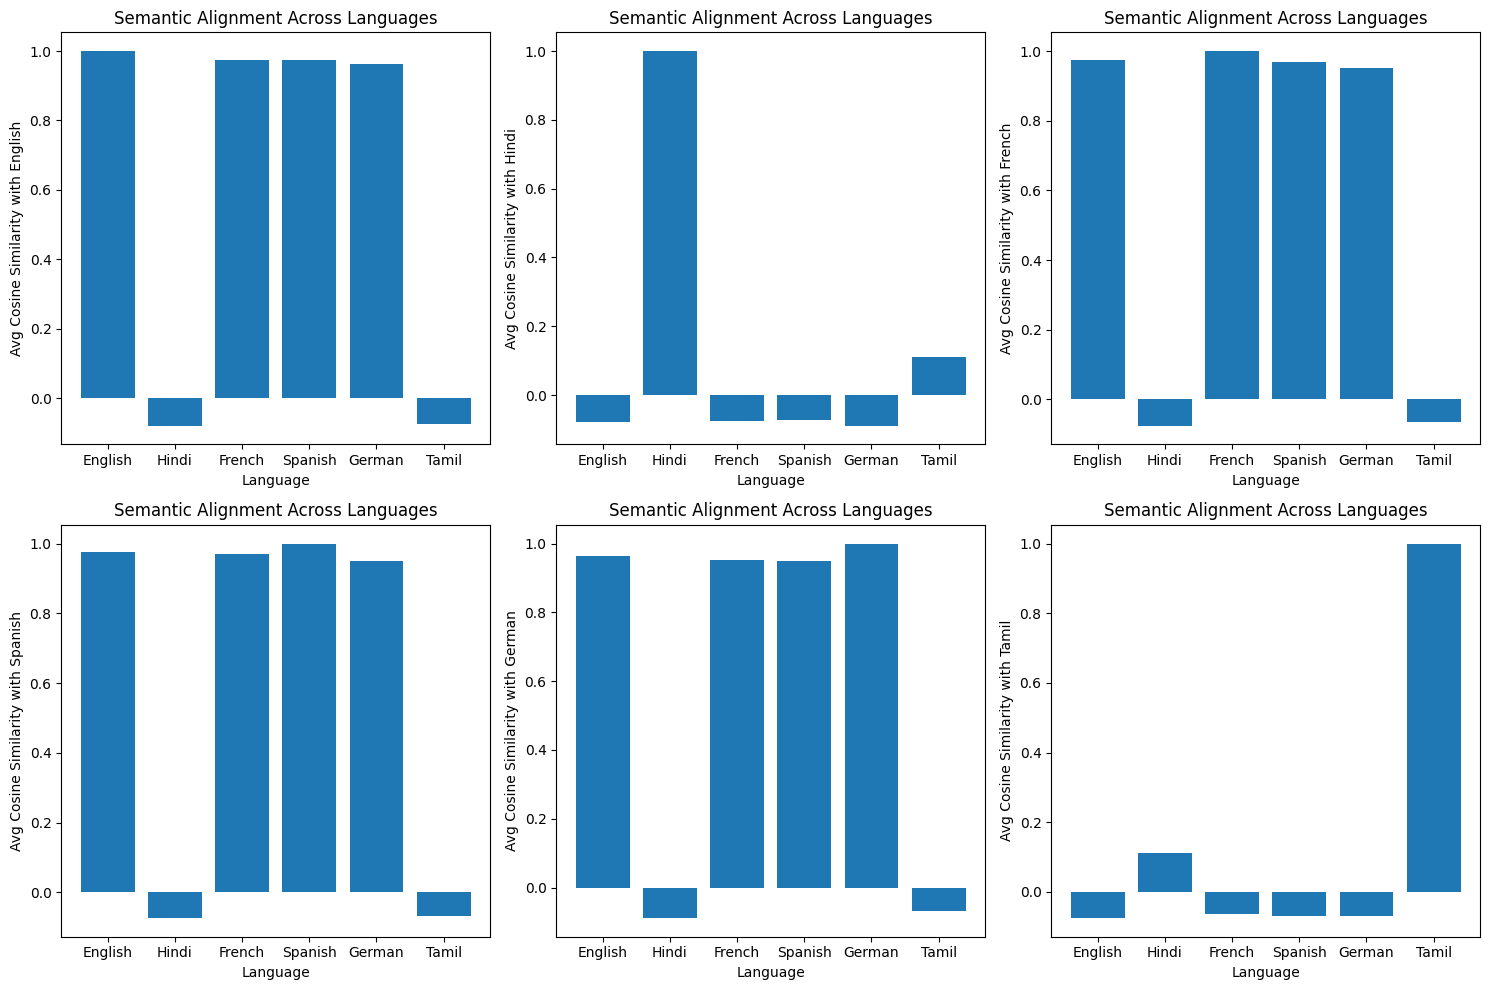

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Function to calculate cosine similarity between two embeddings
def calculate_cosine_similarity(embedding1, embedding2):
    if embedding1 is None or embedding2 is None:
        return None  # Return None if either embedding is missing
    s=(np.dot(embedding1[0],embedding2[0]))/((np.linalg.norm(embedding1[0]))*np.linalg.norm(embedding2[0]))
#     return cosine_similarity([embedding1.numpy()], [embedding2.numpy()])[0][0]
    return s

# Store the cosine similarities
# cosine_similarities = {'hi': [], 'fr': [], 'es': [], 'de': [], 'ta': []}

cosine_similarities = {'en': [], 'hi': [], 'fr': [], 'es': [], 'de': [], 'ta': []}


# Calculate cosine similarities for each word in the dataset
import matplotlib.pyplot as plt
p=0
fig, axs = plt.subplots(2,3, figsize=(15, 10))  # Create subplots for side-by-side graphs


for em in embeddings:
    cosine_similarities = {'en': [], 'hi': [], 'fr': [], 'es': [], 'de': [], 'ta': []}
    for i in range(len(embeddings[em])):
        cosine_similarities['en'].append(calculate_cosine_similarity(embeddings[em][i], embeddings['en'][i]))
        cosine_similarities['hi'].append(calculate_cosine_similarity(embeddings[em][i], embeddings['hi'][i]))
        cosine_similarities['fr'].append(calculate_cosine_similarity(embeddings[em][i], embeddings['fr'][i]))
        cosine_similarities['es'].append(calculate_cosine_similarity(embeddings[em][i], embeddings['es'][i]))
        cosine_similarities['de'].append(calculate_cosine_similarity(embeddings[em][i], embeddings['de'][i]))
        cosine_similarities['ta'].append(calculate_cosine_similarity(embeddings[em][i], embeddings['ta'][i]))

        # Optional: Remove None values from the similarity lists if necessary
    for lang in cosine_similarities:
        cosine_similarities[lang] = [sim for sim in cosine_similarities[lang] if sim is not None]

#     print(cosine_similarities)

    # Calculate average cosine similarity for each language
    average_similarity_en = sum(filter(None, cosine_similarities['en'])) / len(list(filter(None, cosine_similarities['en'])))
    average_similarity_hi = sum(filter(None, cosine_similarities['hi'])) / len(list(filter(None, cosine_similarities['hi'])))
    average_similarity_fr = sum(filter(None, cosine_similarities['fr'])) / len(list(filter(None, cosine_similarities['fr'])))
    average_similarity_es = sum(filter(None, cosine_similarities['es'])) / len(list(filter(None, cosine_similarities['es'])))
    average_similarity_de = sum(filter(None, cosine_similarities['de'])) / len(list(filter(None, cosine_similarities['de'])))
    average_similarity_ta = sum(filter(None, cosine_similarities['ta'])) / len(list(filter(None, cosine_similarities['ta'])))

    # Plot the similarities
    languages = ['English', 'Hindi', 'French', 'Spanish', 'German', 'Tamil']
    averages = [average_similarity_en, average_similarity_hi, average_similarity_fr, average_similarity_es, average_similarity_de, average_similarity_ta]

    row = p // 3  # Determine the row (0 or 1)
    col = p % 3   # Determine the column (0, 1, or 2)
    axs[row, col].bar(languages, averages)
    axs[row, col].set_xlabel('Language')
    axs[row, col].set_ylabel(f'Avg Cosine Similarity with {languages[p]}')
    axs[row, col].set_title('Semantic Alignment Across Languages')
    p=p+1


plt.subplots_adjust(hspace=1.5, wspace=1)  # Adjust horizontal and vertical spacing
plt.tight_layout()
plt.show()

In [40]:
print(len(embeddings['en'][0][0]))

2048


**TASK2**

In [2]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
from datasets import load_dataset

# Load the dataset for different languages
languages = ['english', 'hindi', 'french', 'spanish', 'german']
datasets = {}

for lang in languages:
    datasets[lang] = load_dataset('cardiffnlp/tweet_sentiment_multilingual', lang)

# # Print the dataset info for each language
# for lang, dataset in datasets.items():
#     print(f"{lang.capitalize()} dataset:")
#     print(dataset)
#     print("\n")

english/train/0000.parquet:   0%|          | 0.00/155k [00:00<?, ?B/s]

english/validation/0000.parquet:   0%|          | 0.00/29.1k [00:00<?, ?B/s]

english/test/0000.parquet:   0%|          | 0.00/64.8k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1839 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/324 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/870 [00:00<?, ? examples/s]

hindi/train/0000.parquet:   0%|          | 0.00/117k [00:00<?, ?B/s]

hindi/validation/0000.parquet:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

hindi/test/0000.parquet:   0%|          | 0.00/51.8k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1839 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/324 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/870 [00:00<?, ? examples/s]

french/train/0000.parquet:   0%|          | 0.00/126k [00:00<?, ?B/s]

french/validation/0000.parquet:   0%|          | 0.00/24.3k [00:00<?, ?B/s]

french/test/0000.parquet:   0%|          | 0.00/56.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1839 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/324 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/870 [00:00<?, ? examples/s]

spanish/train/0000.parquet:   0%|          | 0.00/120k [00:00<?, ?B/s]

spanish/validation/0000.parquet:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

spanish/test/0000.parquet:   0%|          | 0.00/58.0k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1839 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/324 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/870 [00:00<?, ? examples/s]

german/train/0000.parquet:   0%|          | 0.00/114k [00:00<?, ?B/s]

german/validation/0000.parquet:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

german/test/0000.parquet:   0%|          | 0.00/54.1k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1839 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/324 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/870 [00:00<?, ? examples/s]

In [4]:
import pandas as pd
# Save each dataset to a separate CSV file
for lang, dataset in datasets.items():
    # Convert to pandas DataFrame
    df = pd.DataFrame(dataset['train'])  # Use the 'train' split
    # Save to CSV
    df.to_csv(f"{lang}_sentiment_dataset.csv", index=False)

print("CSV files created successfully!")

CSV files created successfully!


In [5]:
pip install transformers datasets torch matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import time
import torch
import torch.nn as nn
from transformers import AutoModel, AutoTokenizer
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import AdamW
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class BloomForClassification(nn.Module):
    def __init__(self, base_model, num_classes):
        super(BloomForClassification, self).__init__()
        self.bloom = base_model
        self.classifier = nn.Linear(self.bloom.config.hidden_size, num_classes)
        # Freeze the BLOOM model parameters
        for param in self.bloom.parameters():
            param.requires_grad = False

    def forward(self, input_ids,layer_num, attention_mask=None):
        outputs = self.bloom(input_ids, attention_mask=attention_mask, output_hidden_states=True)
        hidden_states = outputs.hidden_states[layer_num]  # Access the specified layer's hidden states
#         cls_output = hidden_states[:, 0, :]  # Using [CLS] token's representation
#         logits = self.classifier(cls_output)

    # (batch_size, sequence_length, hidden_size)

        # Average the hidden states across all tokens
        avg_hidden_states = hidden_states.mean(dim=1)  # Shape: (batch_size, hidden_size)
        logits = self.classifier(avg_hidden_states)
        return logits

# Load tokenizer and model for BLOOM
tokenizer = AutoTokenizer.from_pretrained("bigscience/bloom-1b7")
base_model = AutoModel.from_pretrained("bigscience/bloom-1b7")



def probemodel(data):
    # Split the data into training and testing sets (70% train, 30% test)
    train_df, test_df = train_test_split(data, test_size=0.3, random_state=42)

    # Display the sizes of the datasets
    print(f"Training data size: {len(train_df)}")
    print(f"Testing data size: {len(test_df)}")

    # Tokenize the training data
    train_encodings = tokenizer(
        train_df['text'].tolist(),
        padding=True,
        truncation=True,
        return_tensors="pt",
        max_length=512
    )

    # Tokenize the testing data
    test_encodings = tokenizer(
        test_df['text'].tolist(),
        padding=True,
        truncation=True,
        return_tensors="pt",
        max_length=512
    )

    # Create Tensor datasets
    train_dataset = TensorDataset(train_encodings['input_ids'], torch.tensor(train_df['label'].values))
    test_dataset = TensorDataset(test_encodings['input_ids'], torch.tensor(test_df['label'].values))

    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

    # Prepare to store accuracies for each layer
    layer_accuracies = []
    test_accuracies = []

    # Iterate through each layer of the BLOOM model (1 to 24)
    for layer_num in range(24):
        print(f"Training with BLOOM layer {layer_num + 1}...")
        
#         device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Initialize the model with the current layer frozen
        model = BloomForClassification(base_model, num_classes)
        
        # Check if a GPU is available and use it if possible
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model.to(device)

        # Prepare the optimizer
        optimizer = AdamW(model.classifier.parameters(), lr=1e-5)

        # Prepare to track accuracy and loss
        train_accuracies = []
        train_losses = []

        # Training loop with time limit
        model.train()  # Set the model to training mode
#         start_time = time.time()  # Start timer
        for epoch in range(6):  # Number of epochs
            correct_predictions = 0
            total_predictions = 0
            epoch_loss = 0

            for batch in train_loader:
                # Check if the time limit has been exceeded
#                 if time.time() - start_time > 15:
#                     print("Time limit exceeded for training. Stopping training.")
#                     break

                input_ids = batch[0].to(device)  # Input IDs
                labels = batch[1].to(device)  # Labels

                optimizer.zero_grad()  # Zero the gradients
                outputs = model(input_ids,layer_num)  # Forward pass

                # Calculate loss
                loss = nn.CrossEntropyLoss()(outputs, labels)
                loss.backward()  # Backward pass
                optimizer.step()  # Update parameters

                # Calculate accuracy
                _, preds = torch.max(outputs, dim=1)
                correct_predictions += (preds == labels).sum().item()
                total_predictions += labels.size(0)

                # Accumulate the loss
                epoch_loss += loss.item()

            # Calculate average accuracy and loss for the epoch
            accuracy = correct_predictions / total_predictions
            avg_loss = epoch_loss / len(train_loader)
            train_accuracies.append(accuracy)
            train_losses.append(avg_loss)

            print(f"Epoch: {epoch + 1}, Training Accuracy: {accuracy:.4f}, Training Loss: {avg_loss:.4f}")

            # Check if the time limit has been exceeded at the end of the epoch
#             if time.time() - start_time > 15:
#                 print("Time limit exceeded for training. Stopping training.")
#                 break

        # Evaluate the model on the test set with time limit
        model.eval()
        correct_predictions = 0
        total_predictions = 0

#         start_time = time.time()  # Start timer for evaluation

        with torch.no_grad():
            for batch in test_loader:
                # Check if time limit has been exceeded
#                 if time.time() - start_time > 15:
#                     print("Time limit exceeded for evaluation. Stopping evaluation.")
#                     break

                input_ids, labels = batch[0].to(device), batch[1].to(device)
                outputs = model(input_ids,layer_num)
                _, preds = torch.max(outputs, dim=1)
                correct_predictions += (preds == labels).sum().item()
                total_predictions += labels.size(0)

        # Calculate test accuracy
        test_accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0.0
        layer_accuracies.append(accuracy)
        test_accuracies.append(test_accuracy)

        print(f"Layer {layer_num + 1} | Training Accuracy: {accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Plot accuracies vs layer numbers
    plt.figure(figsize=(12, 6))
#     plt.plot(range(1, 25), layer_accuracies, label='Training Accuracy', marker='o')
    plt.plot(range(1, 25), test_accuracies, label='Test Accuracy', marker='o')
    plt.xlabel('Layer Number')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Layer Number for BLOOM Model')
    plt.xticks(range(1, 25))  # Set x-ticks for each layer
    plt.legend()
    plt.grid(True)
    plt.show()

    return layer_accuracies, test_accuracies

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/222 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/715 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Training data size: 1287
Testing data size: 552
Training with BLOOM layer 1...
Epoch: 1, Training Accuracy: 0.3458, Training Loss: 1.0987
Epoch: 2, Training Accuracy: 0.3520, Training Loss: 1.0969
Epoch: 3, Training Accuracy: 0.3559, Training Loss: 1.0964
Epoch: 4, Training Accuracy: 0.3598, Training Loss: 1.0955
Epoch: 5, Training Accuracy: 0.3613, Training Loss: 1.0946


Using `past_key_values` as a tuple is deprecated and will be removed in v4.45. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


Epoch: 6, Training Accuracy: 0.3854, Training Loss: 1.0937
Layer 1 | Training Accuracy: 0.3854, Test Accuracy: 0.4112
Training with BLOOM layer 2...
Epoch: 1, Training Accuracy: 0.3497, Training Loss: 1.1002
Epoch: 2, Training Accuracy: 0.3357, Training Loss: 1.0996
Epoch: 3, Training Accuracy: 0.3465, Training Loss: 1.0981
Epoch: 4, Training Accuracy: 0.3489, Training Loss: 1.0984
Epoch: 5, Training Accuracy: 0.3566, Training Loss: 1.0974
Epoch: 6, Training Accuracy: 0.3675, Training Loss: 1.0960
Layer 2 | Training Accuracy: 0.3675, Test Accuracy: 0.3478
Training with BLOOM layer 3...
Epoch: 1, Training Accuracy: 0.3411, Training Loss: 1.1026
Epoch: 2, Training Accuracy: 0.3497, Training Loss: 1.0976
Epoch: 3, Training Accuracy: 0.3380, Training Loss: 1.0968
Epoch: 4, Training Accuracy: 0.3737, Training Loss: 1.0959
Epoch: 5, Training Accuracy: 0.3621, Training Loss: 1.0954
Epoch: 6, Training Accuracy: 0.3776, Training Loss: 1.0946
Layer 3 | Training Accuracy: 0.3776, Test Accuracy: 0

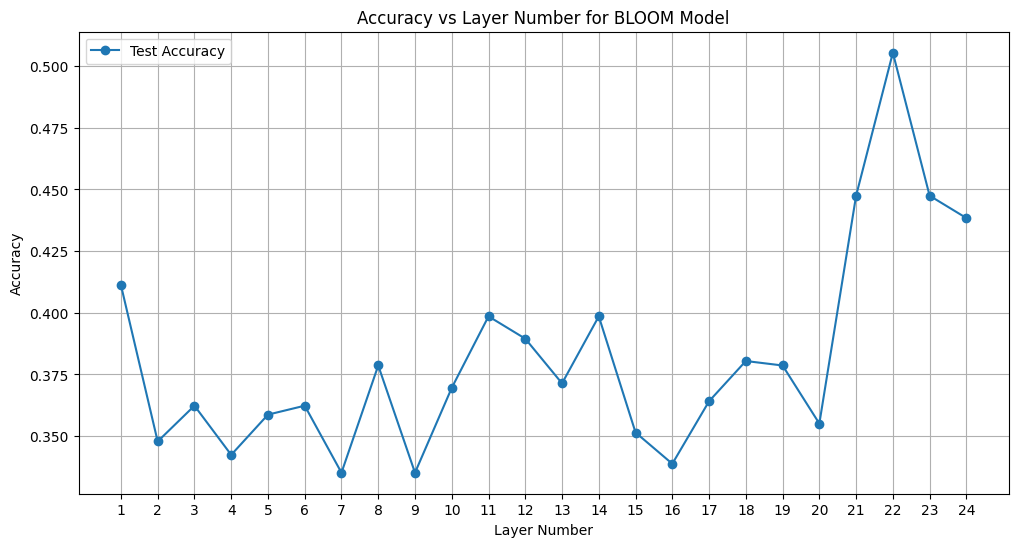

Time taken: 5292.2931 seconds


In [7]:
# Define the number of classes based on your data
data = pd.read_csv("english_sentiment_dataset.csv")
num_classes = len(set(data['label']))  
start_time=time.time()
# Call the model probing function
layer_accuracies,test_accuracies=probemodel(data)
end_time=time.time()
time_taken = end_time - start_time
print(f"Time taken: {time_taken:.4f} seconds")


Training data size: 1287
Testing data size: 552
Training with BLOOM layer 1...
Epoch: 1, Training Accuracy: 0.3310, Training Loss: 1.0988
Epoch: 2, Training Accuracy: 0.3566, Training Loss: 1.0971
Epoch: 3, Training Accuracy: 0.3598, Training Loss: 1.0955
Epoch: 4, Training Accuracy: 0.3737, Training Loss: 1.0944
Epoch: 5, Training Accuracy: 0.3823, Training Loss: 1.0930
Epoch: 6, Training Accuracy: 0.4071, Training Loss: 1.0915
Layer 1 | Training Accuracy: 0.4071, Test Accuracy: 0.3551
Training with BLOOM layer 2...
Epoch: 1, Training Accuracy: 0.3341, Training Loss: 1.1100
Epoch: 2, Training Accuracy: 0.3489, Training Loss: 1.0963
Epoch: 3, Training Accuracy: 0.3691, Training Loss: 1.0957
Epoch: 4, Training Accuracy: 0.3784, Training Loss: 1.0937
Epoch: 5, Training Accuracy: 0.3846, Training Loss: 1.0901
Epoch: 6, Training Accuracy: 0.3901, Training Loss: 1.0913
Layer 2 | Training Accuracy: 0.3901, Test Accuracy: 0.3678
Training with BLOOM layer 3...
Epoch: 1, Training Accuracy: 0.32

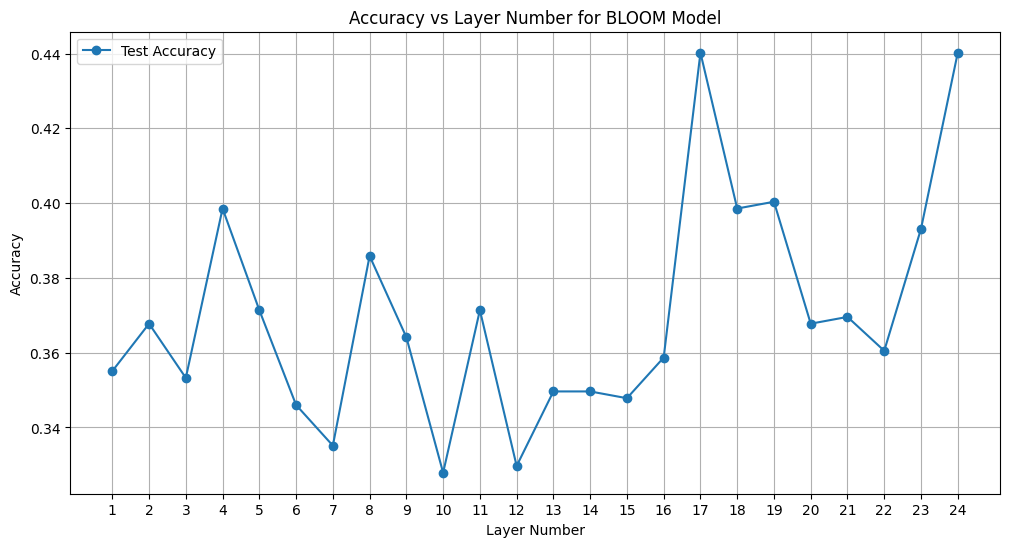

Time taken: 4184.7612 seconds


In [8]:
data = pd.read_csv("french_sentiment_dataset.csv")
num_classes = len(set(data['label']))  
start_time=time.time()
# Call the model probing function
layer_accuracies,test_accuracies=probemodel(data)
end_time=time.time()
time_taken = end_time - start_time
print(f"Time taken: {time_taken:.4f} seconds")

Training data size: 1287
Testing data size: 552
Training with BLOOM layer 1...
Epoch: 1, Training Accuracy: 0.3139, Training Loss: 1.1020
Epoch: 2, Training Accuracy: 0.3333, Training Loss: 1.0978
Epoch: 3, Training Accuracy: 0.3434, Training Loss: 1.0959
Epoch: 4, Training Accuracy: 0.3326, Training Loss: 1.0946
Epoch: 5, Training Accuracy: 0.3372, Training Loss: 1.0928
Epoch: 6, Training Accuracy: 0.3566, Training Loss: 1.0913
Layer 1 | Training Accuracy: 0.3566, Test Accuracy: 0.3750
Training with BLOOM layer 2...
Epoch: 1, Training Accuracy: 0.3310, Training Loss: 1.1366
Epoch: 2, Training Accuracy: 0.3388, Training Loss: 1.0996
Epoch: 3, Training Accuracy: 0.3302, Training Loss: 1.0978
Epoch: 4, Training Accuracy: 0.3333, Training Loss: 1.0964
Epoch: 5, Training Accuracy: 0.3504, Training Loss: 1.0953
Epoch: 6, Training Accuracy: 0.3442, Training Loss: 1.0935
Layer 2 | Training Accuracy: 0.3442, Test Accuracy: 0.3279
Training with BLOOM layer 3...
Epoch: 1, Training Accuracy: 0.34

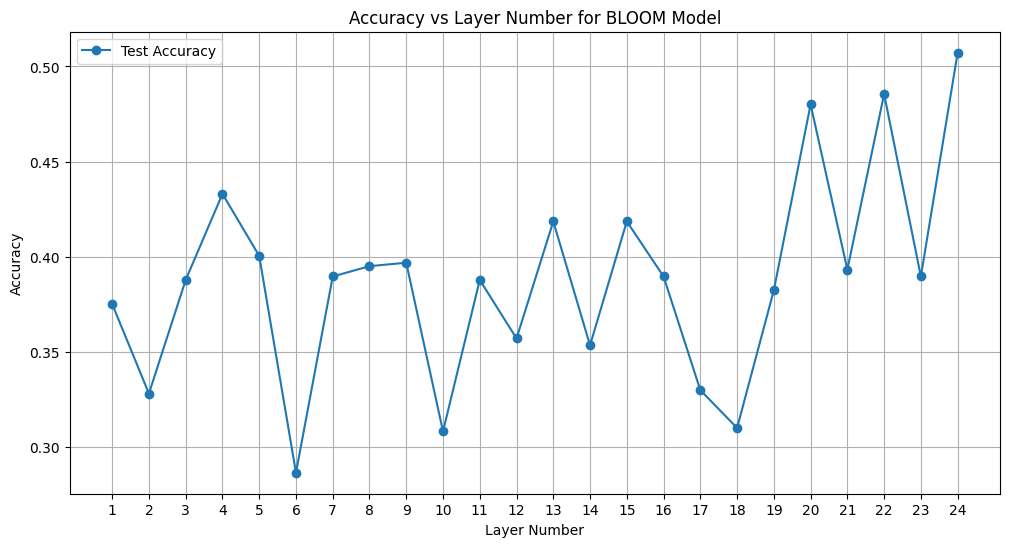

Time taken: 5332.8382 seconds


In [9]:
data = pd.read_csv("german_sentiment_dataset.csv")
num_classes = len(set(data['label']))  
start_time=time.time()
# Call the model probing function
layer_accuracies,test_accuracies=probemodel(data)
end_time=time.time()
time_taken = end_time - start_time
print(f"Time taken: {time_taken:.4f} seconds")



Training data size: 1287
Testing data size: 552
Training with BLOOM layer 1...
Epoch: 1, Training Accuracy: 0.3341, Training Loss: 1.1021
Epoch: 2, Training Accuracy: 0.3279, Training Loss: 1.0994
Epoch: 3, Training Accuracy: 0.3178, Training Loss: 1.0994
Epoch: 4, Training Accuracy: 0.3240, Training Loss: 1.0996
Epoch: 5, Training Accuracy: 0.3279, Training Loss: 1.0993
Epoch: 6, Training Accuracy: 0.3419, Training Loss: 1.0994
Layer 1 | Training Accuracy: 0.3419, Test Accuracy: 0.3243
Training with BLOOM layer 2...
Epoch: 1, Training Accuracy: 0.3155, Training Loss: 1.1724
Epoch: 2, Training Accuracy: 0.3193, Training Loss: 1.1012
Epoch: 3, Training Accuracy: 0.3240, Training Loss: 1.1013
Epoch: 4, Training Accuracy: 0.3380, Training Loss: 1.1006
Epoch: 5, Training Accuracy: 0.3225, Training Loss: 1.1015
Epoch: 6, Training Accuracy: 0.3092, Training Loss: 1.1016
Layer 2 | Training Accuracy: 0.3092, Test Accuracy: 0.3822
Training with BLOOM layer 3...
Epoch: 1, Training Accuracy: 0.33

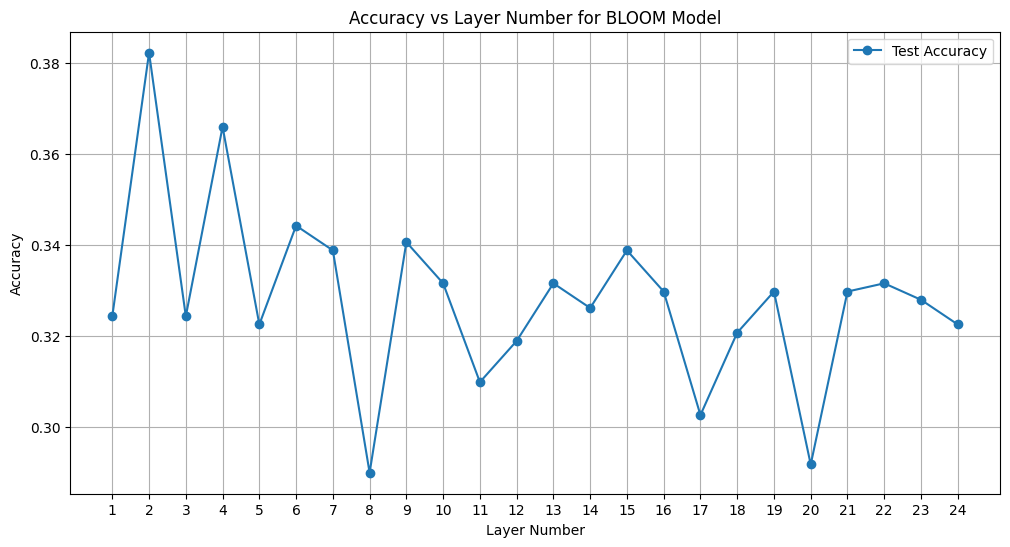

Time taken: 16816.1335 seconds


In [10]:
data = pd.read_csv("hindi_sentiment_dataset.csv")
num_classes = len(set(data['label']))  
start_time=time.time()
# Call the model probing function
layer_accuracies,test_accuracies=probemodel(data)
end_time=time.time()
time_taken = end_time - start_time
print(f"Time taken: {time_taken:.4f} seconds")

Training data size: 1287
Testing data size: 552
Training with BLOOM layer 1...
Epoch: 1, Training Accuracy: 0.3294, Training Loss: 1.0999
Epoch: 2, Training Accuracy: 0.3551, Training Loss: 1.0983
Epoch: 3, Training Accuracy: 0.3675, Training Loss: 1.0971
Epoch: 4, Training Accuracy: 0.3823, Training Loss: 1.0962
Epoch: 5, Training Accuracy: 0.3730, Training Loss: 1.0955
Epoch: 6, Training Accuracy: 0.3932, Training Loss: 1.0945
Layer 1 | Training Accuracy: 0.3932, Test Accuracy: 0.3895
Training with BLOOM layer 2...
Epoch: 1, Training Accuracy: 0.3232, Training Loss: 1.1697
Epoch: 2, Training Accuracy: 0.3294, Training Loss: 1.1017
Epoch: 3, Training Accuracy: 0.3232, Training Loss: 1.1016
Epoch: 4, Training Accuracy: 0.3419, Training Loss: 1.1004
Epoch: 5, Training Accuracy: 0.3473, Training Loss: 1.0993
Epoch: 6, Training Accuracy: 0.3465, Training Loss: 1.0985
Layer 2 | Training Accuracy: 0.3465, Test Accuracy: 0.3460
Training with BLOOM layer 3...
Epoch: 1, Training Accuracy: 0.31

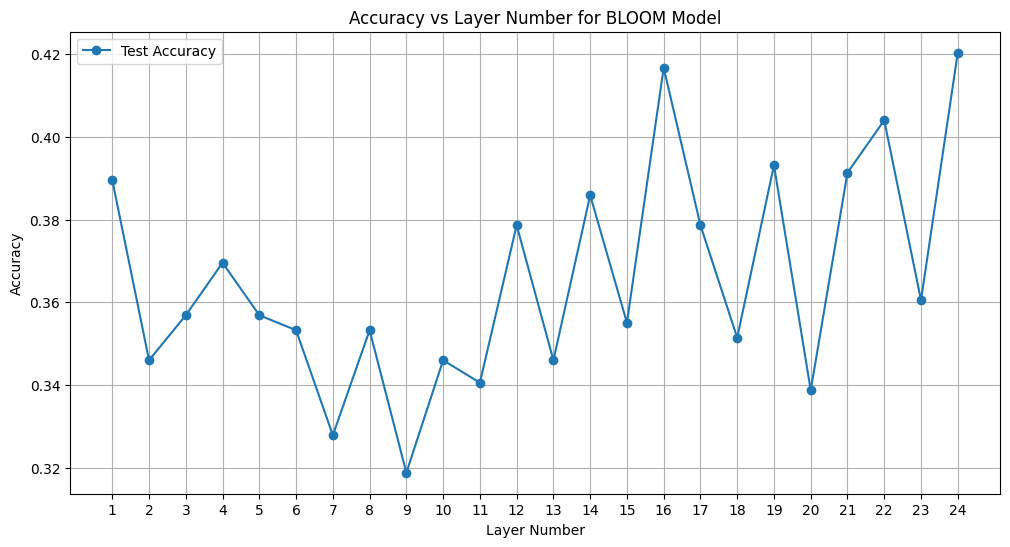

Time taken: 6163.0664 seconds


In [8]:
data = pd.read_csv("spanish_sentiment_dataset.csv")
num_classes = len(set(data['label']))  
start_time=time.time()
# Call the model probing function
layer_accuracies,test_accuracies=probemodel(data)
end_time=time.time()
time_taken = end_time - start_time
print(f"Time taken: {time_taken:.4f} seconds")
